# Sentiment Classification for Movie Review Dataset (English)

본 핸즈온에서는 영화 리뷰에 대한 감정(0: 부정, 1: 긍정)을 요약한 Stanford Sentiment Treebank (SST) 데이터셋으로 AutoGluon 훈련을 수행합니다.

In [1]:
# GPU 인스턴스를 사용하고 CloudFormation으로 실습 환경을 구성하지 않았다면, 아래 주석을 해제하고 본 코드 셀을 실행 후, 노트북을 재시작해 주세요.
# !pip install mxnet-cu110==1.9.1

In [1]:
import os
import torch
import mxnet as mx
num_gpus = torch.cuda.device_count()

if num_gpus == 0:
    os.environ['AUTOGLUON_TEXT_TRAIN_WITHOUT_GPU'] = '1'

print(num_gpus)    

1


In [2]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.random.seed(123)

<br>

## 1. Data preparation and Training

In [3]:
save_path = 'ag-01-sentiment-classifcation-eng'
!rm -rf $save_path

샘플 데이터셋을 다운로드합니다. parquet와 csv를 지원하며, 원격에 저장된 데이터셋을 다운로드하거나 로컬에서 데이터셋을 직접 로드할 수 있습니다.

In [4]:
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(5)

,sentence,label
43787,very pleasing at its best moments,1
16159,", american chai is enough to make you put away...",0
59015,too much like an infomercial for ram dass 's l...,0
5108,a stirring visual sequence,1
67052,cool visual backmasking,1


훈련 지정 시 좀 더 세부적인 하이퍼파라메터 설정이 필요하다면, 사전 정의된 preset을 사용하시면 편리합니다. TextPredictor는 사전 훈련된 BERT, RoBERT, ELECTRA가 내장되어 있으며, 한국어를 비롯한 다국어에 대한 훈련이 필요하면 `multi_cased_bert_base_fuse_late` preset을 사용하시면 됩니다.

In [6]:
from autogluon.text import TextPredictor, list_text_presets
list_text_presets()

['default',
 'medium_quality_faster_train',
 'high_quality',
 'best_quality',
 'multilingual']

In [7]:
list_text_presets(verbose=True)

{'default': {'model.hf_text.checkpoint_name': 'google/electra-base-discriminator'},
 'medium_quality_faster_train': {'model.hf_text.checkpoint_name': 'google/electra-small-discriminator',
  'optimization.learning_rate': 0.0004},
 'high_quality': {'model.hf_text.checkpoint_name': 'google/electra-base-discriminator'},
 'best_quality': {'model.hf_text.checkpoint_name': 'microsoft/deberta-v3-base',
  'env.per_gpu_batch_size': 2},
 'multilingual': {'model.hf_text.checkpoint_name': 'microsoft/mdeberta-v3-base',
  'optimization.top_k': 1,
  'env.precision': 'bf16',
  'env.per_gpu_batch_size': 4}}

In [8]:
predictor = TextPredictor(label='label', eval_metric='acc', path=save_path)
#predictor.fit(train_data, time_limit=60)

predictor.fit(
    train_data=train_data,
    presets="medium_quality_faster_train",
    time_limit=60,
)

Global seed set to 123


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

Auto select gpus: [0]
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 13.5 M
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
13.5 M    Trainable params
0         Non-trainable params
13.5 M    Total params
26.967    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 3: 'val_acc' reached 0.45000 (best 0.45000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=0-step=3.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 7: 'val_acc' reached 0.55500 (best 0.55500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=0-step=7.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 10: 'val_acc' reached 0.61500 (best 0.61500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=1-step=10.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 14: 'val_acc' reached 0.65000 (best 0.65000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=1-step=14.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 17: 'val_acc' reached 0.60500 (best 0.65000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=2-step=17.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 21: 'val_acc' reached 0.81500 (best 0.81500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=2-step=21.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 24: 'val_acc' reached 0.80000 (best 0.81500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=3-step=24.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 28: 'val_acc' reached 0.84000 (best 0.84000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=3-step=28.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 31: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 35: 'val_acc' reached 0.84000 (best 0.84000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=4-step=35.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 38: 'val_acc' reached 0.84500 (best 0.84500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=5-step=38.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 42: 'val_acc' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 45: 'val_acc' reached 0.84500 (best 0.84500), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=6-step=45.ckpt' as top 3
Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 47: 'val_acc' reached 0.85000 (best 0.85000), saving model to '/home/ec2-user/SageMaker/autogluon-on-aws/2.nlp/ag-01-sentiment-classifcation-eng/epoch=6-step=47.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<br>

## 2. Evaluation and Prediction

### Evaluation
`predictor.evaluation()`를 사용하여 평가를 쉽게 수행할 수 있으며, F1 score 등의 추가 metric도 지정 가능합니다.

In [9]:
if num_gpus > 0:
    test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
    print(test_score)    

Predicting: 0it [00:00, ?it/s]

{'acc': 0.801605504587156, 'f1': 0.808839779005525}


### Prediction
`predictor.predict()`으로 예측을 수행할 수 있습니다.

In [10]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

Predicting: 0it [00:00, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0


In [11]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

Predicting: 0it [00:00, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": 0    0.000639
1    0.869077
Name: 0, dtype: float32
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": 0    0.999361
1    0.130923
Name: 1, dtype: float32


전체 데이터셋에 대해 추론을 수행할 수도 있습니다.

In [12]:
# test_predictions = predictor.predict(test_data)
# test_predictions.head()

### Save and Load

predictor는 `fit()` 함수로 모델 훈련 시에 자동으로 모델을 저장하며, `load()` 함수를 통해 재로드할 수 있습니다. 물론 `save()` 함수로 모델을 저장하는 것도 가능합니다.

In [13]:
loaded_predictor = TextPredictor.load(save_path)
loaded_predictor.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: ag-01-sentiment-classifcation-eng/model.ckpt


Predicting: 0it [00:00, ?it/s]

,0,1
0,0.000639,0.999361
1,0.869077,0.130923


### Extract Embeddings
훈련된 predictor를 사용하여 임베딩 벡터에 매핑하는 임베딩을 추출할 수도 있습니다.

아래 코드 셀에서 TSNE를 사용하여 추출된 임베딩을 시각화합니다. 두 레이블에 해당하는 두 개의 클러스터가 잘 분포해 있음을 확인할 수 있습니다.

Predicting: 0it [00:00, ?it/s]

[[-0.9950073   0.19104779  0.30278355 ... -0.15227251 -0.2078394
  -0.8929618 ]
 [-0.37055644  0.54944015 -0.08293767 ... -0.37117034 -1.52807
  -1.0482882 ]
 [-0.89614105  0.13071844  0.14226806 ...  0.04598733 -0.5800471
  -0.8197252 ]
 ...
 [-0.48994136  0.35927728  0.02496865 ...  0.6498142  -0.7644585
  -0.8643593 ]
 [-0.35284802 -0.0030367   0.31872958 ...  0.31603014 -0.7678774
  -0.7084229 ]
 [-0.64051795  0.5525908   0.25442797 ...  0.22971036 -0.82027364
  -0.7009061 ]]


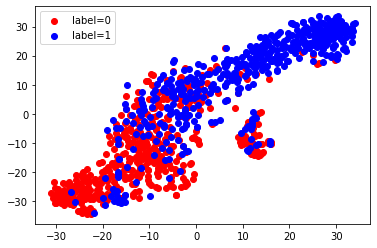

In [14]:
if num_gpus > 0:
    from sklearn.manifold import TSNE
    embeddings = predictor.extract_embedding(test_data)
    print(embeddings)
    
    X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
    for val, color in [(0, 'red'), (1, 'blue')]:
        idx = (test_data['label'].to_numpy() == val).nonzero()
        plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
    plt.legend(loc='best')    

<br>

## 3. Continuous Training

이전에 훈련한 모델을 로드하고 `fit()`을 호출하여, 신규 데이터나 기존 데이터로 계속 훈련할 수 있습니다.

In [15]:
save_cont_path = 'ag-01-sentiment-classifcation-cont-eng'
!rm -rf $save_cont_path